In [ ]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
mat = scipy.io.loadmat('mnistALL.mat')

In [ ]:
mat.keys()


In [ ]:
data = mat['mnist']
train_images = data[0][0][0]
train_labels = data[0][0][2]
test_images = data[0][0][1]
test_labels = data[0][0][3]

In [ ]:
fig = plt.figure()
im = plt.imshow(train_images[:,:,0], vmin = 0.5, vmax=2, interpolation = 'none')
plt.show()

In [13]:
data_file = scipy.io.loadmat('mnist_all.mat') # load mnist_all.mat (if in same folder.!)
X3 = np.transpose(data_file['train3']) # fetch and transpose training 3's
X7 = np.transpose(data_file['train7'])
n = int(np.size(X3, 0)) # number of pixels
x3 = np.float32(X3) / -256.0 # go to float between 0 and 1, multiply 3s by -1
x7 = np.float32(X7) / 256.0
x3 = np.vstack([x3, np.squeeze(-1 * np.ones((np.size(x3, 1), 1)))]) # add label as n+1-th dimension
x7 = np.vstack([x7, np.squeeze(np.ones((np.size(x7, 1), 1)))])
x = np.transpose(np.hstack([x3, x7])) # create variable x with all training data
p = int(np.size(x, 0)) # number of patterns

In [329]:
N = 500 # number of samples (-1 for all samples)
def data_preparation(N):
    
    x_all = train_images.reshape(784,-1)/256 #Normalize values to the range between [0,1]
    x3 = x_all[:,np.where(train_labels==3)[0]][:,:N] # Each column contains the 784 pixels of a image
    x7 = x_all[:,np.where(train_labels==7)[0]][:,:N]
    y3 = -1*np.ones((1,x3.shape[1])) #Label the 3's as -1
    y7 = np.ones((1,x7.shape[1])) #Label the 7's as 1

    X = [x3,x7]
    Y = [y3,y7]

    x_all_test = test_images.reshape(784,-1)/256 #Normalize values to the range between [0,1]
    x3t = x_all_test[:,np.where(test_labels==3)[0]][:,:N] # Each column contains the 784 pixels of a image
    x7t = x_all_test[:,np.where(test_labels==7)[0]][:,:N]
    y3t = -1*np.ones((1,x3t.shape[1])) #Label the 3's as -1
    y7t = np.ones((1,x7t.shape[1])) #Label the 7's as 1

    Xt = [x3t,x7t]
    Yt = [y3t,y7t]
    return X, Y, Xt, Yt


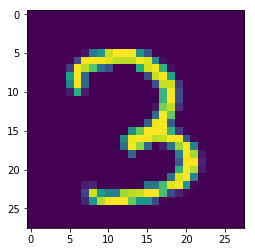

In [121]:
plt.imshow(x3t[:,12].reshape((28,28)))
plt.show()

In [122]:
def sgn(x):
    if(x<0).all():
        return -1
    else:
        return 1
    

In [176]:
def train_perceptron(X,Y, eta):
    """Calculate weight matrix using the perceptron algorithm
    
    Args:
        X (array): Contains all the training data
        Y (array): Contains the labels of the training data
    Returns:
        W (array): weights
    """
    X = np.hstack(X)
    Y = np.hstack(Y)[0]
    num_features, num_images = X.shape
    X = np.vstack((np.ones((X.shape[1])),X))
    W = np.random.rand(num_features+1).reshape((-1,1))

    sampling = np.arange(X.shape[1])
    np.random.shuffle(sampling)

    converged = False
    iterations = 0
    n_updates = 0
    acc_per_step = []
    while converged==False and iterations < 10000:
        converged = True
        iterations += 1
        for i in sampling:
            if sgn(X[:,i]@W) != Y[i]:
                converged = False
                W = W + eta*Y[i]*X[:,i].reshape(W.shape)
                n_updates += 1
                _, acc = classify(X,Y,W,False)
                acc_per_step.append(acc)
    print(iterations)
    return W, acc_per_step
    


In [177]:
def classify(X,Y,W, data_mod):
    if data_mod == True:
        X = np.hstack(X)
        Y = np.hstack(Y)[0]
        X = np.vstack((np.ones((X.shape[1])),X))
        
    num_images = X.shape[1]
    classification_result = np.zeros(num_images)
    sampling = np.arange(X.shape[1])
    np.random.shuffle(sampling)
    for i in sampling:
        classification_result[i] = sgn(X[:,i]@W) 
    
    accuracy = np.sum((classification_result == Y)*1)/num_images

    return classification_result, accuracy

In [330]:
N=500
X,Y,Xt,Yt = data_preparation(N)
eta = 0.1
W, accuracy = train_perceptron(X,Y,eta)

In [316]:

s = classify(Xt,Yt,W, True)
print(s[1])

0.89


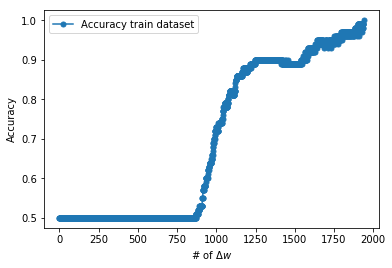

In [181]:

    
plt.plot(accuracy,'o',markersize=5,linestyle='-',label = 'Accuracy train dataset')
plt.xlabel('# of $\Delta w$')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [353]:
accuracies = []

data_sizes = [10,50,150,300,500]
learning_rates = [0.001,0.01,0.1,1,5,10,100,1000]
Weights = np.zeros((785,len(data_sizes)*len(learning_rates)))
for i,N in enumerate(data_sizes[:]):
    X, Y, Xt, Yt = data_preparation(N)
    for j,eta in enumerate(learning_rates[:]):
        W, accuracy = train_perceptron(X,Y,eta)
        accuracies.append(accuracy)
        Weights[:,i*len(learning_rates)+j]=W.ravel()

143
19
3
3
3
2
2
2
202
16
5
2
3
3
3
4
242
19
8
8
4
5
5
5
415
42
11
10
12
9
11
7
366
56
12
13
23
17
13
21


In [ ]:
import pickle
#save data
'''
with open('weights', 'wb') as fp:
    pickle.dump(accuracies, fp)
with open('accuracies', 'wb') as fp:
    pickle.dump(accuracies, fp)
'''

In [365]:


with open ('accuracies', 'rb') as fp:
    itemlist = pickle.load(fp)
    

with open ('weights', 'rb') as fp:
    Weights = pickle.load(fp)

<Figure size 432x288 with 0 Axes>

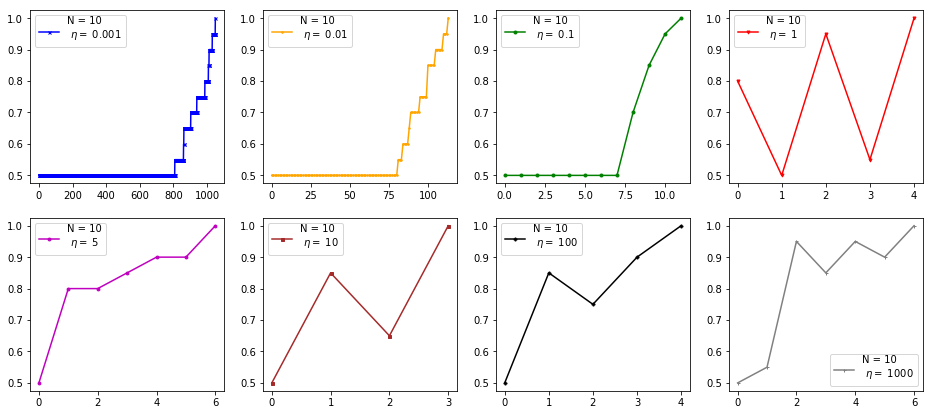

<Figure size 432x288 with 0 Axes>

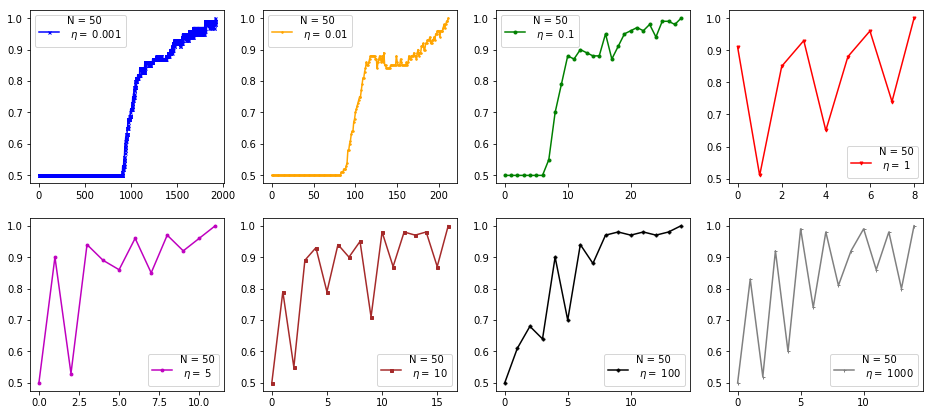

<Figure size 432x288 with 0 Axes>

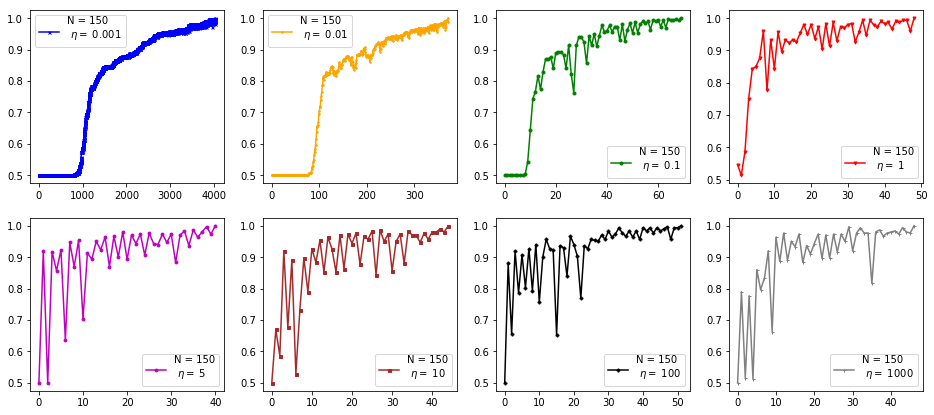

<Figure size 432x288 with 0 Axes>

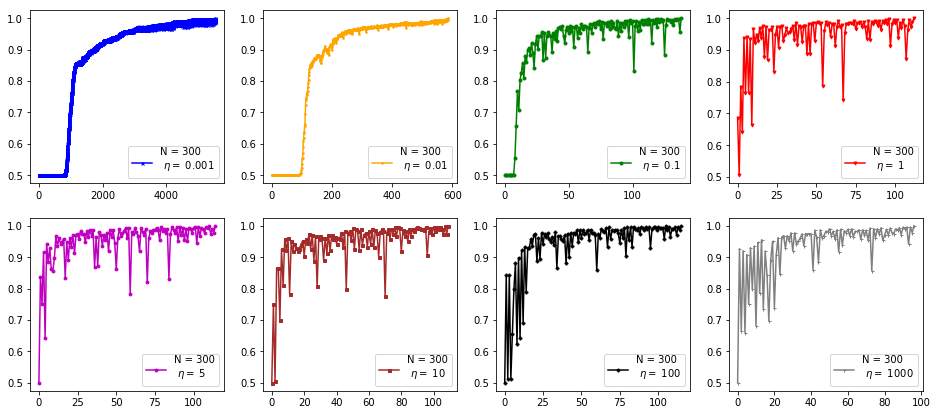

<Figure size 432x288 with 0 Axes>

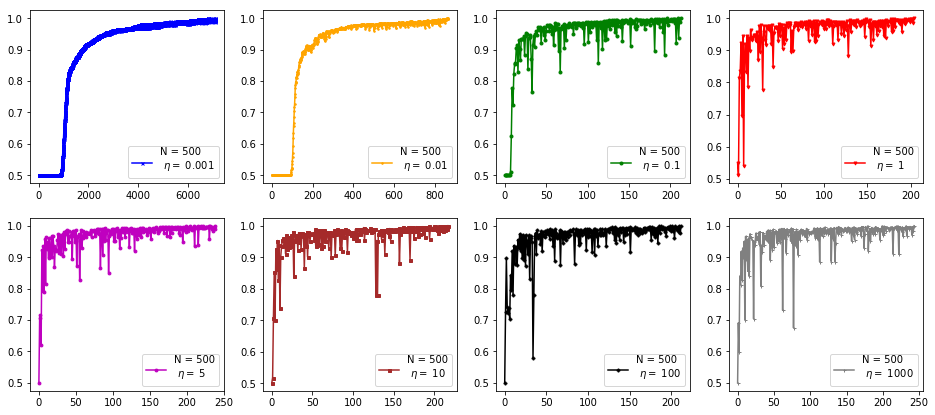

In [366]:


for i, N in enumerate(data_sizes):
    plt.figure()
    plt.subplots(nrows=2,ncols=4,figsize=(16,7))
    for j, eta in enumerate(learning_rates):
        plt.subplot(241+j)
        plt.plot(accuracies[i*len(learning_rates)+j], marker=markers[j],markersize=3, color=colors[j],linestyle='-', label = 'N = %s\n $\eta=$ %s' %(N,eta))
        plt.legend()
    plt.show()


<Figure size 432x288 with 0 Axes>

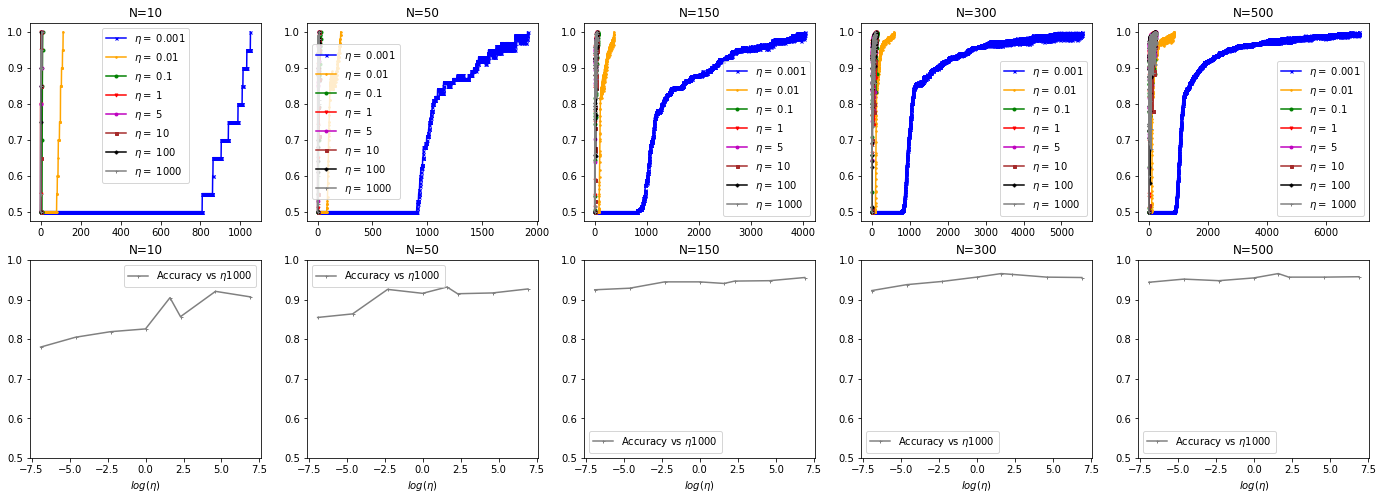

In [386]:
markers = ['x', '.','o','v','8','s','P','+']
colors = ['b','orange','g','r','m','brown','black','grey']

accuracies_test =[]

plt.figure()
plt.subplots(nrows=2,ncols=5,figsize=(24,8))
for i , N in enumerate(data_sizes):
    plt.subplot(2,5,i+1)
    for j, eta in enumerate(learning_rates):
        _, acc = classify(Xt,Yt,Weights[:,i*len(learning_rates)+j],data_mod=True)
        accuracies_test.append(acc)
        
        
        plt.plot(accuracies[i*len(learning_rates)+j], marker=markers[j],markersize=3, color=colors[j],linestyle='-', label = '$\eta=$ %s' %eta)
        plt.title('N=%s' %N)
    plt.legend()

    plt.subplot(2,5,i+len(data_sizes)+1)
    plt.plot(np.log(learning_rates),accuracies_test[i*len(learning_rates):(i+1)*len(learning_rates)], marker=markers[j],markersize=3, color=colors[j],linestyle='-', label = 'Accuracy vs $\eta$%s' %eta)
    plt.xlabel('$log(\eta)$')
    plt.ylim([0.5,1])
    plt.title('N=%s' %N)
    plt.legend()
plt.show()    

<Figure size 432x288 with 0 Axes>

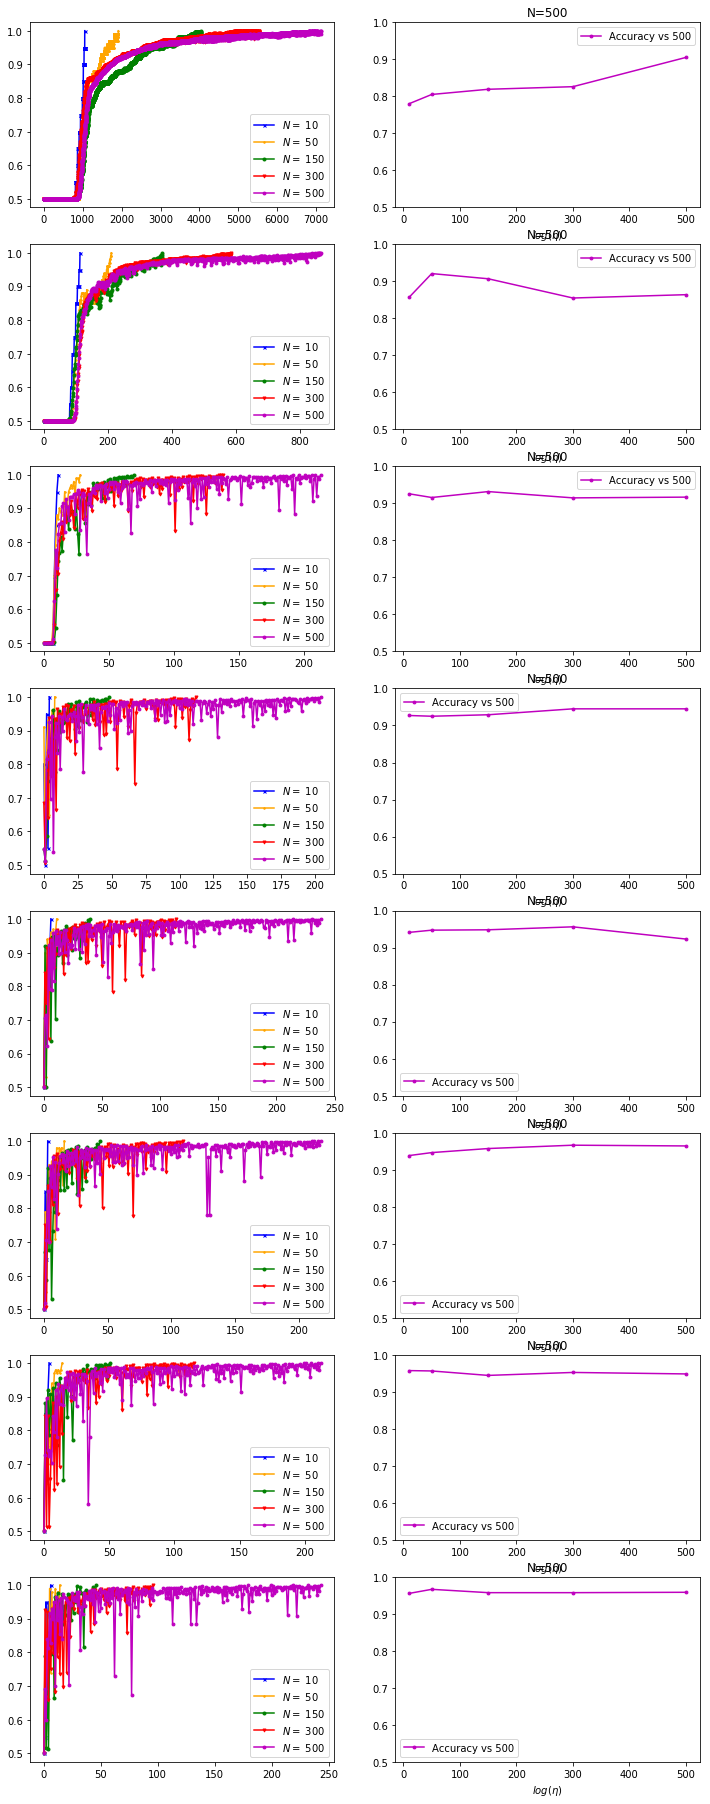

In [399]:
markers = ['x', '.','o','v','8','s','P','+']
colors = ['b','orange','g','r','m','brown','black','grey']
plt.figure()

plt.subplots(nrows=8,ncols=2,figsize=(12,32))
for i , eta in enumerate(learning_rates):
    plt.subplot(8,2,(2*i+1))
    
    for j, N in enumerate(data_sizes):
        _, acc = classify(Xt,Yt,Weights[:,i+j*len(learning_rates)],data_mod=True)
        plt.plot(accuracies[i+j*len(learning_rates)], marker=markers[j],markersize=3, color=colors[j],linestyle='-', label = '$N=$ %s' %N)
    plt.legend()
    plt.subplot(8,2,(i+1)*2)
    plt.plot(data_sizes,accuracies_test[i*len(data_sizes):(i+1)*len(data_sizes)], marker=markers[j],markersize=3, color=colors[j],linestyle='-', label = 'Accuracy vs %s' %N)
    plt.xlabel('$log(\eta)$')
    plt.ylim([0.5,1])
    plt.title('N=%s' %N)
    plt.legend()
plt.show()    